In [121]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.ndimage import gaussian_filter1d, gaussian_filter

In [294]:
def gen_fields (N=10000, sigma=100, smooth_sigma=400, M=50, rms_LA=1.2, rms_ndx=0.5, radiometer_noise=1e-4):
    freq = np.linspace(1,50,M)
    logA = gaussian_filter1d(np.random.normal(0, 1, N), sigma)
    logA *= rms_LA / np.std(logA)
    A = 10**logA
    ndx = gaussian_filter1d(np.random.normal(0, 1, N), sigma)
    ndx *= rms_ndx / np.std(ndx)
    mp = A[:,None]*(freq[None,:]/50)**(ndx[:,None])
    mpn = mp + mp*radiometer_noise*np.random.normal(0,1,mp.shape)
    mps = gaussian_filter(mpn, sigma=(smooth_sigma,0))
    mpsn = mps + mps*radiometer_noise*np.random.normal(0,1,mps.shape)
    return A, ndx, mpn, mpsn


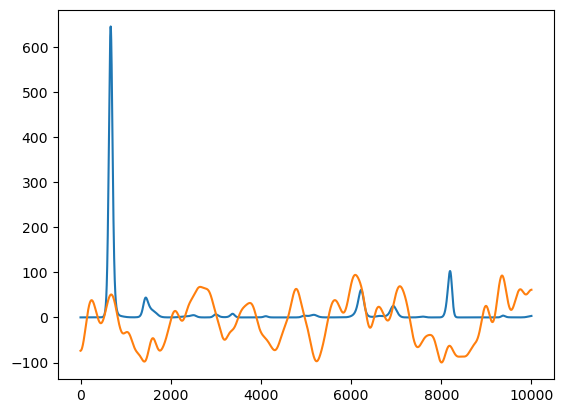

In [308]:
smooth_sigma=400
radiometer_noise=1e-3
A, ndx, mp, mps = gen_fields(smooth_sigma=smooth_sigma, radiometer_noise=radiometer_noise)
As = gaussian_filter1d(A,smooth_sigma)
plt.plot(A)
plt.plot(ndx*100)

In [309]:
def get_eig (mp, w=None):
    # take off the 
    if w is None:
        w = np.ones(mp.shape[0])
    mn = np.average(mp, axis=0, weights=w)
    mpx= mp - mn[None,:]
    cov = np.cov(mpx, rowvar=False, aweights=w)
    evals, evecs = la.eigh(cov)
    #sort evals end evecs in descending order
    ndx = np.argsort(evals)[::-1]
    evals = evals[ndx]
    evecs = evecs[:,ndx]

    sig2 = [np.dot(evec,mn)**2 for evec in evecs.T]


    return evals, evecs, mn, sig2






[]

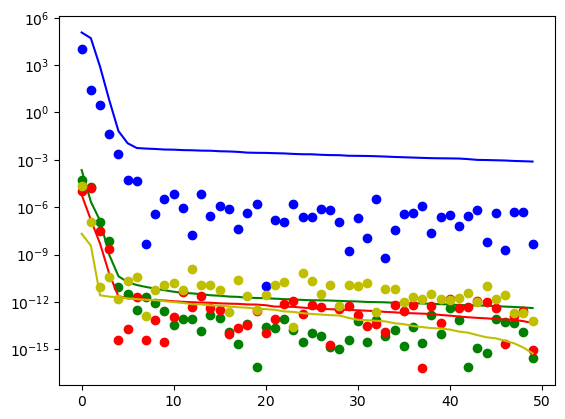

In [312]:
eval1,_,_,sig1 = get_eig(mp, w=None)
eval2,_,_,sig2 = get_eig(mp, w=1/A**4)
eval3,_,_,sig3 = get_eig(mp, w=1/A**8)
eval4,_,_,sig4 = get_eig(mp, w=1/A**24)
plt.plot(eval1,  'b-')
plt.plot(sig1, 'bo')
plt.plot(eval2,  'g-')
plt.plot(sig2, 'go')
plt.plot(eval3,  'r-')
plt.plot(sig3, 'ro')
plt.plot(eval4,  'y-')
plt.plot(sig4, 'yo')
plt.semilogy()


[]

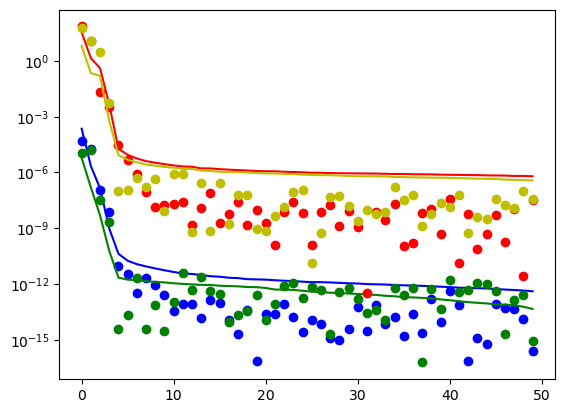

In [311]:
eval1,_,_,sig1 = get_eig(mp, w=1/A**4)
eval2,_,_,sig2 = get_eig(mp, w=1/A**8)
eval3,_,_,sig3 = get_eig(mps, w=1/As**4)
eval4,_,_,sig4 = get_eig(mps, w=1/As**8)
plt.plot(eval1,  'b-')
plt.plot(sig1, 'bo')
plt.plot(eval2,  'g-')
plt.plot(sig2, 'go')
plt.plot(eval3,  'r-')
plt.plot(sig3, 'ro')
plt.plot(eval4,  'y-')
plt.plot(sig4, 'yo')
plt.semilogy()